# Distribuzioni di probabilità a più dimensioni

Si può generalizzare la densità di probabilità, definita per una variabile $x$ come:

$\displaystyle f(x) = \frac{\mathrm{d}P(x)}{\mathrm{d}x}$

Passando a due (o anche più) dimensioni $(x,y)$ come segue:

$\displaystyle f(x,y) = \frac{\mathrm{d}P(x,y)}{\mathrm{d}x\,\mathrm{d}y}$

Questa volta, $\mathrm{d}x\,\mathrm{d}y$ rappresenta l'elemeno di superficie in due dimensioni nelle coordinate $(x,y)$.

In [1]:
import numpy as np
from scipy.stats import norm

Definiamo la funzione:
$f(x,y) = g(x)g(y)$
dove $g$ è una gaussiana con media 0 e deviazione standard 1:

In [2]:
def f(x, y):
    return norm.pdf(x)*norm.pdf(y)

Definiamo una griglia $100\times 100$ che servirà per graficare la PDF in più dimensioni.

In [3]:
nptx, npty = 101, 101
x_p = np.linspace(-5, 5, nptx)
y_p = np.linspace(-5, 5, npty)

Con ```numpy``` si può definire una [```meshgrid```](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) che ci aiuterà nell'operazione di plot. In  pratica, per ogni punto sulla griglia definiamo quali sono le sue coordinate $x$ e $y$, e poi calcoliamo il valore $z$ come $f(x,y)$:

In [10]:
x, y = np.meshgrid(x_p, y_p)

In [11]:
z = f(x, y)

Quindi passiamo tutto a ```matplotlib``` per graficare in 3D. Esistono vari tipi di grafico, vedremo il *wireframe* e una superficie colorata.

Per approfondimenti:
* [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)


In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

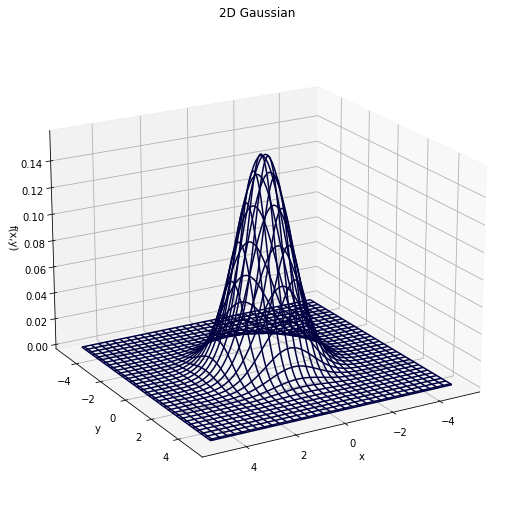

In [13]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='#000040')
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

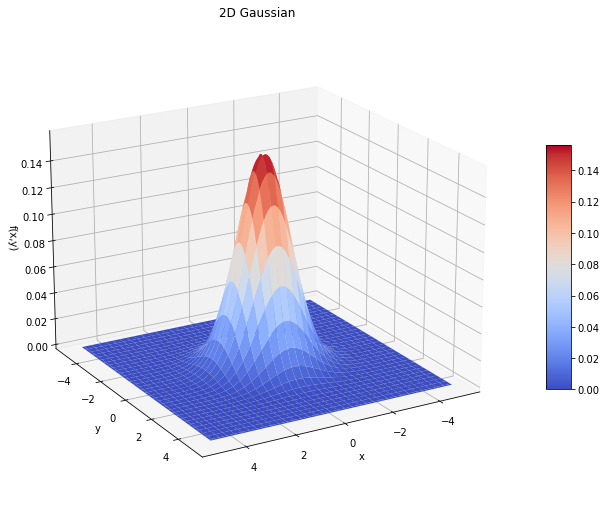

In [19]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title('2D Gaussian')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

Si può proiettare anche la PDF in due dimensioni mostrando i valori della PDF o come mappa colorata, oppure come una serie di **curve equiprobabili**.

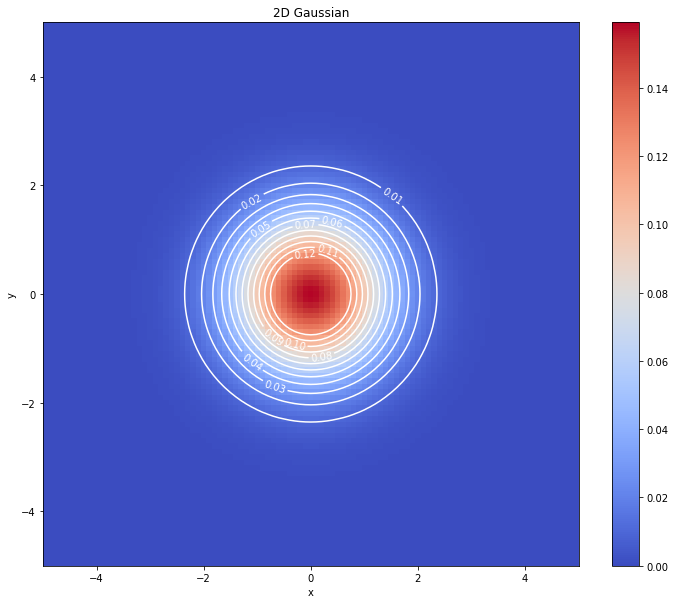

In [22]:
figure, ax = plt.subplots(figsize=(12,10))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, shading='auto')
con = ax.contour(x, y, z, np.linspace(0, 0.12, 13), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

## Distribuzioni a tre o più dimensioni

Analogamente a tre dimensioni si può definire:

$\displaystyle f(x,y,z) = \frac{\mathrm{d}P(x,y,z)}{\mathrm{d}x\,\mathrm{d}y\,\mathrm{d}z}$

Una PDF a $n$ dimensioni è definita analogamente:

$\displaystyle f(x_1,\cdots,x_n) = \frac{\mathrm{d}P(x_1,\cdots,x_n)}{\mathrm{d}x_1\cdots \mathrm{d}x_n}$


Resta la difficoltà di graficare oltre le due dimensioni.

# Distribuzioni marginali

Le distribuzioni di probabilità per le variabili $x$ e $y$ si ottengono integrando sull'altra (sulle altre, per più di due variabili) variabile:

$\displaystyle f_x(x) = \int f(x,y)\,\mathrm{d}y$

$\displaystyle f_y(y) = \int f(x,y)\,\mathrm{d}x$

$f_x$ e $f_y$ rappresentano le distribuzioni di probabilità di ciascuna variabile separatamente.

In sostanza, la distribuzione di probabilità di una sola variabile si ottiene *proiettando* la PDF su quella variabile.

Quando considereremo il problema generale del cambio di variabili, vedremo che le distribuzioni marginali si ottengono come caso particolare della trasformazione $\varphi: (x,y)\in X\times Y \mapsto y=\varphi(x)\in Y$.

Più in generale, si può ottenere la distribuzione marginale per un sottoinsieme di variabili:

$\displaystyle f_{1\cdots k}(x_1,\cdots, x_k) = \int f(x_1,\cdots, x_n)\,\mathrm{d}x_{k+1}\cdots\mathrm{d}x_n$


# Distribuzione condizionata

Fissato un valore $x=x_0$, la PDF di $y$ si può calcolare normalizzando la PDF che viene calcolata per il valore di $x_0$ fissato:

$\displaystyle f(y|x_0) = \frac{f(x_0,y)}{\int f(x_0,y)\,\mathrm{d}y} = 
\frac{f(x_0,y)}{f_x(x_0)}
$

Nel grafico seguente mostriamo la distribuzione condizionata **non** normalizzata, per motivi grafici. Ossia, mostriamo $f(x_0,y)$ e non $f(y|x_0)$, che andrebbe moltiplicata per un fattore di normalizzazione $1/f_x(x_0)$.

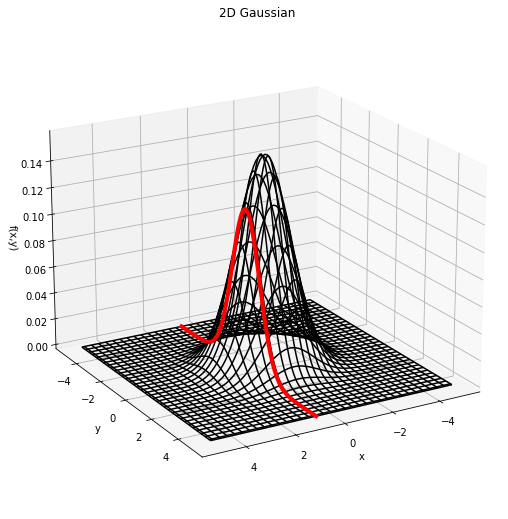

In [23]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='black')
ax.plot([0.75]*nptx, y_p, f(0.75, y_p), color='red', zorder=10, linewidth=4)
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

Analogamente, fissato un valore $y=y_0$, la PDF di $x$ si può calcolare normalizzando la PDF che viene calcolata per il valore di $y_0$ fissato:

$\displaystyle  f(x|y_0) = \frac{f(x,y_0)}{\int f(x,y_0)\,\mathrm{d}x} =
\frac{f(x,y_0)}{f_y(y_0)}
$

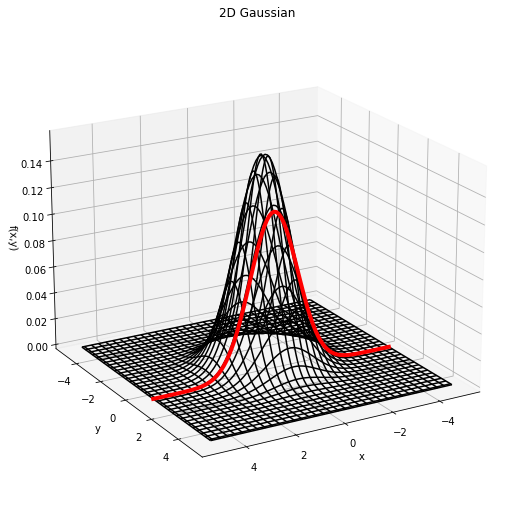

In [25]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(20, 60)
ax.plot_wireframe(x, y, z, color='black')
ax.plot(x_p, [0.75]*nptx, f(x_p, 0.75), color='red', zorder=10, linewidth=4)
ax.set_title('2D Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

# Eventi e variabili indipendenti. Fattorizzazione della probabilità

Un evento $A$ è indipendente dall'evento $B$ se:

$P(A|B) = P(A)$

Ricordando la definizione di probabilità condizionata:

$\displaystyle P(A|B) = \frac{P(A\cap B)}{P(B)} = P(A)$

Quindi:

$P(A\cap B) = P(A)P(B)$

Vista la simmetria di questa condizione, se $A$ è indipendente da $B$, $B$ è indipendente da $A$. Si parla quindi di eventi $A$ e $B$ tra di loro indipendenti.

## Variabili continue

Consideriamo l'evento $A$ (o $B$) corrisponda al fatto che il valore $\tilde x$ (o $\tilde y$) di una delle variabili casuali $x$ (o $y$) ricada entro un intervallo infinitesimo:

$A = \{\tilde x: x \le \tilde{x} < x+\delta x\}$

$B = \{\tilde y: y \le \tilde{y} < y+\delta y\}$

A questi eventi corrispondono le seguenti probabilità:

$P(A) = \delta P(x) = f_x(x)\,\delta x$

$P(B) = \delta P(y) = f_y(y)\,\delta y$

L'intersezione di $A$ e $B$ ha probabilità:

$\displaystyle P(A\cap B) = P(x \le \tilde{x} < x+\delta x\,\, and\,\, y \le \tilde{y} < y+\delta y) = \delta P(x,y) = f(x,y)\,\delta x\,\delta y$

<img style="width: 400px;" src="img/pdf2d.png">

La condizione di indipendenza di $A$ e $B$ diventa quindi equivalente a:

$P(A\cap B) = P(A)P(B) \implies \delta P(x, y) = \delta P(x) \delta P(y)
\implies f(x,y)\,\delta x\,\delta y = f_x(x) f_y(y)\,\delta x\,\delta y$

Quindi possiamo scrivere:

$f(x,y) = f_x(x) f_y(y)$

Se la PDF si fattorizza nel prodotto di due PDF, ciascuna nelle due variabili $x$ e $y$, 
diciamo che $x$ e $y$ sono **variabili indipendenti**.


Più in generale, possiamo definire indipendenti i gruppi di variabili $x_1, \cdots, x_n$ e $y_1, \cdots, y_m$ se la PDF si può fattorizzare in:

$f(x_1, \cdots, x_n, y_1, \cdots, y_m) = f_x(x_1,\cdots, x_n) f_y(y_1,\cdots, y_m)$


# Correlazione

Nel caso di distribuzioni a più variabili, abbiamo già definito nel caso discreto la **covarianza** di due variabili come:

$\mathbb{C}\mathrm{ov}(x, y) = \mathbb{E}[x y] - \mathbb{E}[x] \mathbb{E}[y]$

Il coefficiente di correlazione invece è:

$\displaystyle \rho_{xy} = \frac{\mathbb{C}\mathrm{ov}(x, y)}{\sigma_x \sigma_y}$

e risulta $-1\le \rho_{xy} \le 1$.

Si dimostra anche che:

$\mathbb{V}\mathrm{ar}[x+y] = \mathbb{V}\mathrm{ar}[x] + \mathbb{V}\mathrm{ar}[y] + 2\,\mathbb{C}\mathrm{ov}(x, y)$

<span style="color:blue">Si può dimostrare facilmente che due variabbili indipendenti hanno correlazione zero.</span>
    
<span style="color:blue">Ma se la correlazione è zero, questo **non** implica che due variabili siano indipendenti!</span>

# Spunti per esercizi

* Due variabili casuali definite in $[0,+\infty[$, $x$ e $y$ hanno distribuzione di probabilità $f(x,y; a, b) = ab \exp(-a\,x - b\,y)$. Calcolare la probabilità che sia contemporaneamente $x>a$ e $y>b$. Il calcolo si può fare facilmente in maniera analitica.

$\displaystyle P = \int_a^{+\infty}\!\! \mathrm{d}x \int_b^{+\infty}\!\! \mathrm{d}y\, f(x,y;a,b) =
\int_a^{+\infty}\!\! \mathrm{d}x \int_b^{+\infty}\!\! \mathrm{d}y\, ab \exp(-a\,x - b\,y) =
ab \int_a^{+\infty}\!\! \mathrm{d}x \exp(-a\,x)\int_b^{+\infty}\!\! \mathrm{d}y\,\exp(-b\,y) =
\cdots
$

* Per la stessa distribuzione, calcolare la probabilità che sia $x+y > c$

$\displaystyle P = \int_0^{+\infty}\!\! \mathrm{d}x \int_{c-x}^{+\infty}\!\! \mathrm{d}y\, f(x,y;a,b) = \cdots
$

* Definire e graficare una PDF bidimensionale che sia combinazione della funzione sopra con probabilità 30% e di una gaussiana bidimensionale con probabilità 70%. Si scelgano valori opportuni del parametri.

$f(x,y) = w_1 f_1(x,y) + w_2 f_2(x,y)$

Con $w_1 + w_2=1$

* Trovare una PDF bidimensionale per due variabbili scorrelate che non siano indipendenti.

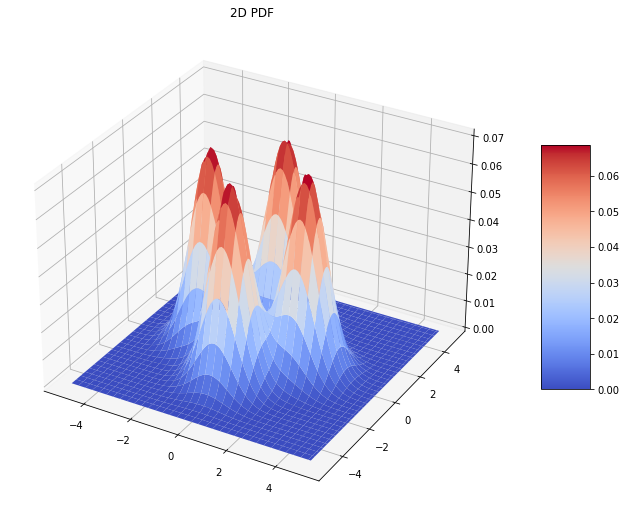

In [26]:
mu = 2
sigma = 0.75
x_p = np.linspace(-5, 5, 101)
y_p = np.linspace(-5, 5, 101)
x, y = np.meshgrid(x_p, y_p)
def pdf(x, y):
    nx = norm.pdf(x, mu, sigma)*norm.pdf(y, 0, sigma)+norm.pdf(x, -mu, sigma)*norm.pdf(y, 0, sigma)
    ny = norm.pdf(x, 0, sigma)*norm.pdf(y, mu, sigma)+norm.pdf(x, 0, sigma)*norm.pdf(y, -mu, sigma)
    return (nx+ny)/4
z = pdf(x, y)
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title('2D PDF')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

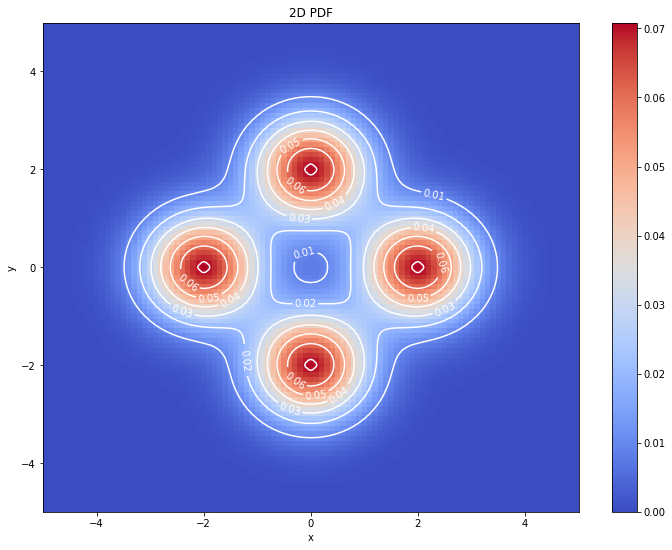

In [29]:
figure, ax = plt.subplots(figsize=(12,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(), shading='auto')
con = ax.contour(x, y, z, np.linspace(0, 0.07, 8), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D PDF')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

La simmetria della distribuzione ci permette di dire subito che:
* $\mathbb{E}[x] = \mathbb{E}[y] = 0$

Va ora calcolato $\mathbb{E}[x^2]$ che sarà uguale a $\mathbb{E}[y^2]$ per la simmetria rispetto allo scambo $x\leftrightarrow y$

$\displaystyle\mathbb{E}[x^2] = \int x^2\,f(x,y)\,\mathrm{d}x\mathrm{d}y =$
 
$\displaystyle=\frac{1}{4}\int x^2\left[
g(x;\mu,\sigma)g(y, 0, \sigma) + 
g(x;-\mu,\sigma)g(y, 0, \sigma) + 
g(x;0,\sigma)g(y, \mu, \sigma) + 
g(x;0,\sigma)g(y, -\mu, \sigma)
\right]\,\mathrm{d}x\mathrm{d}y
$

Ingradando in $\mathrm{d}y$, possiamo usare la condizione di normalizzazione:

$\displaystyle \int g(y, \mu, \sigma)\,\mathrm{d}y = 1$

quindi:

$\displaystyle\mathbb{E}[x^2] =
\frac{1}{4}\int x^2\left[
g(x;\mu,\sigma) + 
g(x;-\mu,\sigma) + 
g(x;0,\sigma) + 
g(x;0,\sigma)
\right]\mathrm{d}x
$

Si può ricordare che $\mathbb{V}\mathrm{ar}[x] = \mathbb{E}[x^2] - \mathbb{E}[x]^2 = \sigma^2$.
Quindi, per una variabile $z$ normale, $\mathbb{E}[z^2] = \sigma^2+\mathbb{E}[z]^2$, dove $\mathbb{E}[z]$ sarà, nei tre casi, $\mu$, $0$ o $-\mu$. Quindi otterremo:

$\displaystyle\mathbb{E}[x^2] =
\frac{1}{4}\left[
(\sigma^2 + \mu^2) + 
(\sigma^2 + (-\mu)^2) + 
2\sigma^2
\right] = \sigma^2+\frac{\mu^2}{2} = \displaystyle\mathbb{E}[y^2]
$

Ora resta da calcolare $\mathbb{E}[xy]$:


$\displaystyle\mathbb{E}[xy] = \int xy\,f(x,y)\,\mathrm{d}x\mathrm{d}y =$

$\displaystyle=\frac{1}{4}\int xy\left[
g(x;\mu,\sigma)g(y, 0, \sigma) + 
g(x;-\mu,\sigma)g(y, 0, \sigma) + 
g(x;0,\sigma)g(y, \mu, \sigma) + 
g(x;0,\sigma)g(y, -\mu, \sigma)
\right]\,\mathrm{d}x\mathrm{d}y
$

Il calcolo si riduce a quello dei valori attesi di $x$ e $y$, vista la fattorizzazione di ciascuno dei quattro termini della PDF:

$\displaystyle\displaystyle\mathbb{E}[xy]=\frac{1}{4}\left[
\mu\cdot 0  -
\mu\cdot 0 + 
0\cdot \mu -
0\cdot \mu
\right] = 0
$

La covarianza tra $x$ e $y$ vale quindi:

$\mathbb{C}\mathrm{ov}(x,y) = \mathbb{E}[xy] - \mathbb{E}[x]\mathbb{E}[y] = 0$

Quindi $x$ e $y$ sono **scorrelate**. Ma è ovvio che **non sono indipendenti**. Se fossero indipendenti, potremmo scrivere $f(x,y)$ come il prodotto di due PDF, una funzione solo di $x$, l'altra funzione solo di $y$. Ma questo è evidentemente impossibile.

In generale, quindi, variabili scorrelate non sono necessariamente indipendenti.